In [ ]:
#importing neccessary libraries 

In [1]:
pip install matplotlib

In [2]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [4]:
import os

In [5]:
base_dir = 'C:/Users/COMP/men wear bottoms'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
#we have 140 photos for training dataset 60 for each category and 60 photos for validation dataset 30 for each category

In [6]:
# Directory with our train jeans pictures
train_jeans_dir = os.path.join(train_dir, 'jeans')
# Directory with our train trousers pictures
train_trousers_dir = os.path.join(train_dir, 'trousers')

# Directory with our validation jeans pictures
validation_jeans_dir = os.path.join(validation_dir, 'jeans')

# Directory with our validation trousers pictures
validation_trousers_dir = os.path.join(validation_dir, 'trousers')

In [7]:
train_trousers_fnames = os.listdir(train_trousers_dir)
print(train_trousers_fnames[:10])

train_jeans_fnames = os.listdir(train_jeans_dir)

print(train_jeans_fnames[:10])

['trousers.0.jpeg', 'trousers.1.jpeg', 'trousers.10.jpeg', 'trousers.11.jpeg', 'trousers.12.jpeg', 'trousers.13.jpeg', 'trousers.14.jpeg', 'trousers.15.jpeg', 'trousers.16.jpeg', 'trousers.17.jpeg']
['jeans.0.jpeg', 'jeans.1.jpeg', 'jeans.10.jpeg', 'jeans.11.jpeg', 'jeans.12.jpeg', 'jeans.13.jpeg', 'jeans.14.jpeg', 'jeans.15.jpeg', 'jeans.16.jpeg', 'jeans.17.jpeg']


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

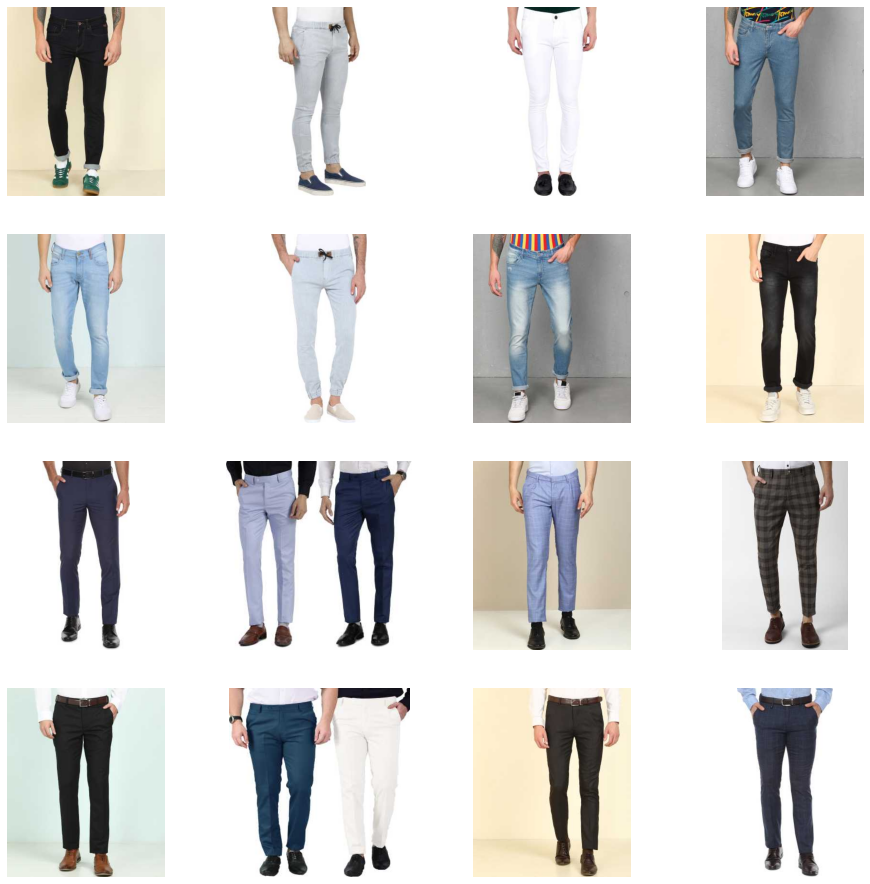

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jeans_pix = [os.path.join(train_jeans_dir, fname) 
                for fname in train_jeans_fnames[pic_index-8:pic_index]]
next_trousers_pix = [os.path.join(train_trousers_dir, fname) 
                for fname in train_trousers_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jeans_pix+next_trousers_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
print('total training jeans images:', len(os.listdir(train_jeans_dir)))
print('total training trousers images:', len(os.listdir(train_trousers_dir)))
print('total validation jeans images:', len(os.listdir(validation_jeans_dir)))
print('total validation trousers images:', len(os.listdir(validation_trousers_dir)))

total training jeans images: 70
total training trousers images: 70
total validation jeans images: 30
total validation trousers images: 30


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [15]:
input_shape=(150,150,3)
img_width=150
img_height=150
nb_train_samples=140
nb_validation_samples=60


batch_size=20
epochs=20
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
train_datagen_augmented=ImageDataGenerator(rescale=1./255,
                                          shear_range=0.2,
                                          zoom_range=0.2,rotation_range=30,horizontal_flip=True)
train_generator_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 36, 36, 64)        0         
_______________________________________

In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=nb_train_samples//batch_size,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=nb_validation_samples//batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 3 steps
Epoch 1/20
7/7 [==============================] - 7s 959ms/step - loss: 0.6368 - acc: 0.6357 - val_loss: 0.6727 - val_acc: 0.7167
Epoch 2/20
7/7 [==============================] - 7s 980ms/step - loss: 0.6130 - acc: 0.6714 - val_loss: 0.6767 - val_acc: 0.5833
Epoch 3/20
7/7 [==============================] - 7s 936ms/step - loss: 0.6114 - acc: 0.6786 - val_loss: 0.6700 - val_acc: 0.7000
Epoch 4/20
7/7 [==============================] - 7s 996ms/step - loss: 0.5976 - acc: 0.6929 - val_loss: 0.6646 - val_acc: 0.6000
Epoch 5/20
7/7 [==============================] - 7s 1s/step - loss: 0.5905 - acc: 0.6571 - val_loss: 0.6617 - val_acc: 0.6833
Epoch 6/20
7/7 [==============================] - 6s 926ms/step - loss: 0.6023 - acc: 0.7429 - val_loss: 0.6588 - val_acc: 0.7000
Epoch 7/20
7/7 [==============================] - 6s 912ms/step - loss: 0.5621 - acc: 0.7643 - val_loss: 0.6546 - val_acc: 0.6833
Epo

In [18]:
history.history
#we can see at the starting we are facing overfitting then gradually our loss is decreasing and validation accuracy is increasing till 76 max

{'loss': [0.6368138108934674,
  0.6130049739565168,
  0.6113796745027814,
  0.5976268861974988,
  0.5904541909694672,
  0.6022619009017944,
  0.5620870036738259,
  0.5394244534628732,
  0.5540410365377154,
  0.5458512433937618,
  0.5034730860165187,
  0.48761509571756634,
  0.46036403094019207,
  0.49325584513800486,
  0.4518529943057469,
  0.4516761175223759,
  0.4295538493565151,
  0.37828383488314493,
  0.3838804577078138,
  0.3978689802544458],
 'acc': [0.6357143,
  0.67142856,
  0.6785714,
  0.69285715,
  0.6571429,
  0.74285716,
  0.76428574,
  0.75714284,
  0.75714284,
  0.7785714,
  0.7714286,
  0.7785714,
  0.78571427,
  0.79285717,
  0.8428571,
  0.8357143,
  0.8428571,
  0.8642857,
  0.8428571,
  0.8357143],
 'val_loss': [0.6726874510447184,
  0.6767134467760721,
  0.669972836971283,
  0.6645750800768534,
  0.6616593798001608,
  0.6588439146677653,
  0.6546165347099304,
  0.6561248103777567,
  0.6565787196159363,
  0.6437490979830424,
  0.6257705887158712,
  0.61641973257064

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

Text(0.5, 1.0, 'Training and validation loss')

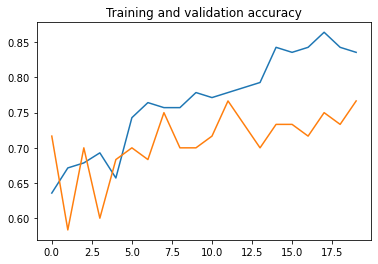

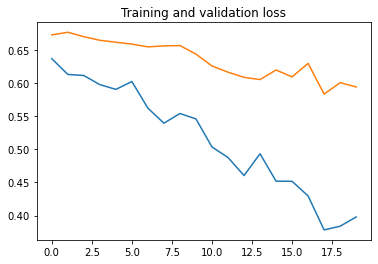

In [20]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

plt.title('Training and validation loss')